In [1]:
from datascience import *
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Classifiers

- `distance(pt1, pt2)`: Returns the distance between the arrays `pt1` and `pt2`
- `row_distance(row1, row2)`: Returns the distance between the rows `row1` and `row2`
- `distances(training, example)`: Returns a table that is `training` with an additional column `'Distance'` that contains the distance between `example` and each row of `training`
- `closest(training, example, k)`: Returns a table of the rows corresponding to the k smallest distances 
- `majority_class(topk)`: Returns the majority class in the `'Class'` column
- `classify(training, example, k)`: Returns the predicted class of `example` based on a `k` nearest neighbors classifier using the historical sample `training`

In [18]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(np.array(row1), np.array(row2))

def distances(training, example):
    """
    Compute distance between example and every row in training.
    Return training augmented with Distance column
    """
    distances = make_array()
    attributes_only = training.drop('Class')
    
    for row in attributes_only.rows:
        distances = np.append(distances, row_distance(row, example))
        
    return training.with_column('Distance_to_ex', distances)

def closest(training, example, k):
    """
    Return a table of the k closest neighbors to example
    """
    return distances(training, example).sort('Distance_to_ex').take(np.arange(k))

def majority_class(topk):
    """
    Return the class with the highest count
    """
    return topk.group('Class').sort('count', descending=True).column(0).item(0)

def classify(training, example, k):
    """
    Return the majority class among the 
    k nearest neighbors of example
    """
    return majority_class(closest(training, example, k))

In [19]:
patients = Table.read_table('data/breast-cancer.csv').drop('ID')
attributes = patients.drop('Class')

In [36]:
example = attributes.row(21)
example

Row(Clump Thickness=10, Uniformity of Cell Size=5, Uniformity of Cell Shape=5, Marginal Adhesion=3, Single Epithelial Cell Size=6, Bare Nuclei=7, Bland Chromatin=7, Normal Nucleoli=10, Mitoses=1)

In [37]:
classify(patients.exclude(21), example, 5)

1

## Accuracy of a Classifier ##
- split the dataset **randomly** into a training set and a test set
- write an evaluation function which 
    - computes the classification for each row in the test set
    - counts how many classifications were done correctly

In [26]:
patients.num_rows

683

In [27]:
shuffled = patients.sample(with_replacement=False) # Randomly permute the rows
training_set = shuffled.take(np.arange(342))
test_set  = shuffled.take(np.arange(342, 683))

In [28]:
def evaluate_accuracy(training, test, k):
    """Return the proportion of correctly classified examples 
    in the test set"""
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        c = classify(training, test_attributes.row(i), k)
        num_correct = num_correct + (c == test.column('Class').item(i))
    return num_correct / test.num_rows

In [32]:
evaluate_accuracy(training_set, test_set, 1)

0.9589442815249267

In [30]:
evaluate_accuracy(training_set, test_set, 3)

0.9706744868035191

In [29]:
evaluate_accuracy(training_set, test_set, 5)

0.9794721407624634

In [31]:
evaluate_accuracy(training_set, test_set, 11)

0.9736070381231672

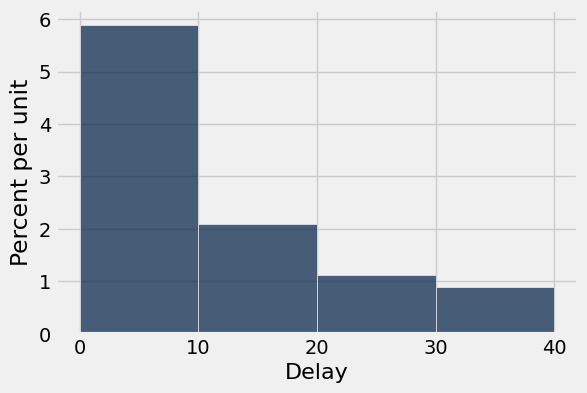

In [51]:
Table.read_table('data/united.csv').where('Delay', are.below(100)).hist('Delay', bins=np.arange(0,50,10))
plots.savefig('de.png', dpi=200)

In [ ]:
left_bound = percentile(7.5, bootstrap_stat)
right_bound = percentile(100-7.5, bootstrap_stat)

In [ ]:
Table.read_table('data/